In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range('2024-01-01','2024-12-31')

regions = ['서울','부산','대구','광주','인천']
products = ['A','B','C','D']

data = {
    'date':np.random.choice(dates, 1000),
    'region': np.random.choice(regions, 1000),
    'product': np.random.choice(products, 1000),
    'sales': np.random.randint(100, 1000, 1000),
    'profit': np.random.randint(10, 200, 1000)
}

df = pd.DataFrame(data)

df = df.sort_values('date').reset_index(drop=True)

df.to_csv('sales_data.csv', index=False, encoding='utf-8-sig')

print("'sales_data.csv' 파일이 생성되었습니다.")
print(df.head())

'sales_data.csv' 파일이 생성되었습니다.
        date region product  sales  profit
0 2024-01-01     광주       B    982     173
1 2024-01-01     광주       C    134     124
2 2024-01-01     부산       D    148     123
3 2024-01-01     광주       A    745      74
4 2024-01-01     서울       B    389     147


In [5]:
conda activate ai


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [7]:
! pip install seaborn folium matplotlib plotly

In [9]:
pip install folium

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)

   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('sales_data.csv')

df['date'] = pd.to_datetime(df['date'])
print(type(df['date']))
df['sales']

<class 'pandas.core.series.Series'>


0      982
1      134
2      148
3      745
4      389
      ... 
995    731
996    585
997    836
998    378
999    186
Name: sales, Length: 1000, dtype: int64

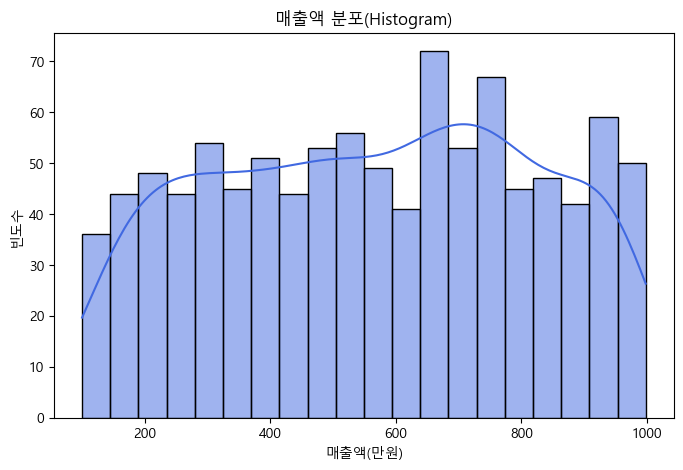

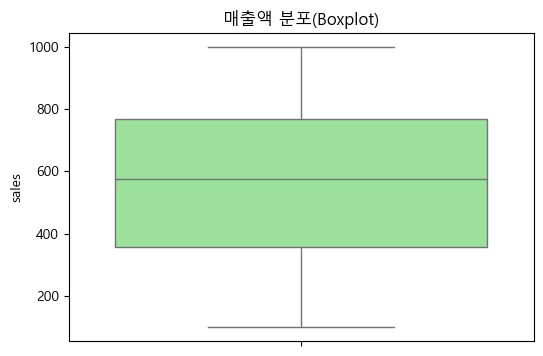

In [28]:
# 총 매출액 분포(단일 변수 분포 확인)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=20, kde=True, color='royalblue')
plt.title('매출액 분포(Histogram)')
plt.xlabel('매출액(만원)')
plt.ylabel('빈도수')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y='sales', data=df, color='lightgreen')
plt.title('매출액 분포(Boxplot)')
plt.show()


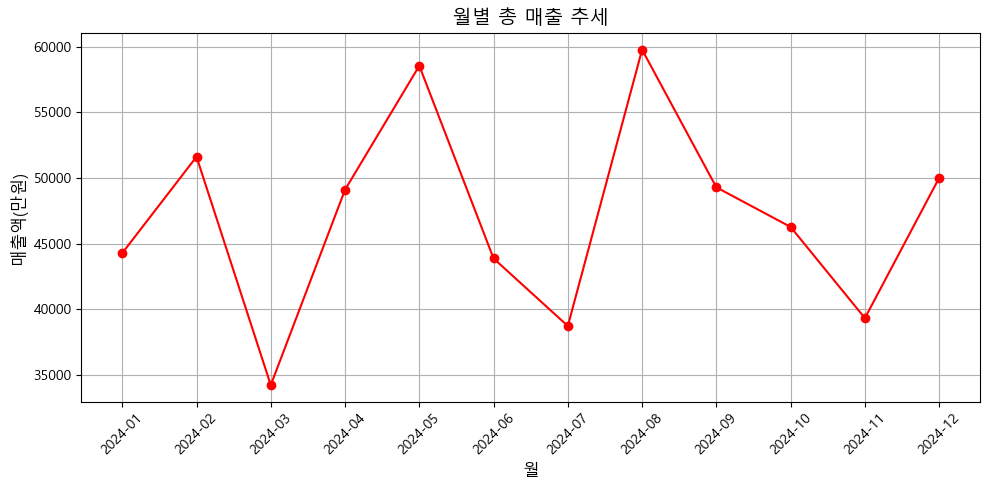

In [38]:
# 월별 총 매출 추세(시간 순서)

df['date'] = pd.to_datetime(df['date'])

# 월 단위 매출 집계
df_month = df.groupby(df['date'].dt.to_period('M')).sum(numeric_only=True)
df_month.index = df_month.index.astype(str)

plt.figure(figsize=(10,5))

# 선 그래프 생성
plt.plot(df_month.index, df_month['sales'], marker='o', color='red')

# 그래프 제목, 축이름, 격자 설정
plt.title('월별 총 매출 추세', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('매출액(만원)', fontsize=12)
plt.grid(True)

# x 축 눈금 라벨 회전
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

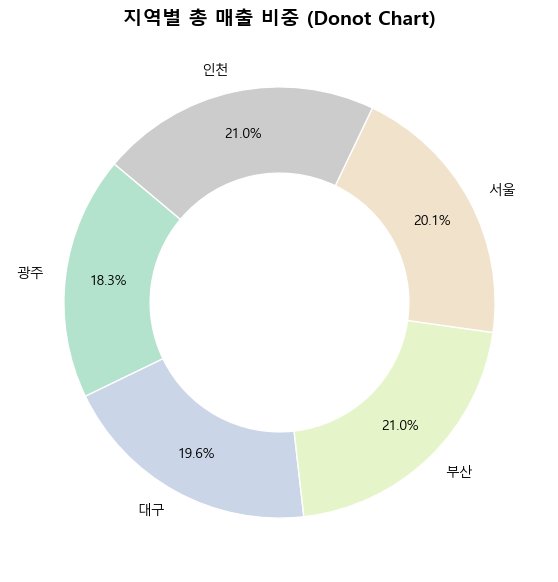

In [44]:
import numpy as np

region_sales = df.groupby('region')['sales'].sum()
colors = plt.cm.Pastel2(np.linspace(0,1,len(region_sales)))

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    region_sales,
    labels=region_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.8,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

ax.set_title('지역별 총 매출 비중 (Donot Chart)', fontsize=14, fontweight='bold')
plt.show()


In [45]:
## 제품별 매출-이익 상관관계 (두 변수 관계)

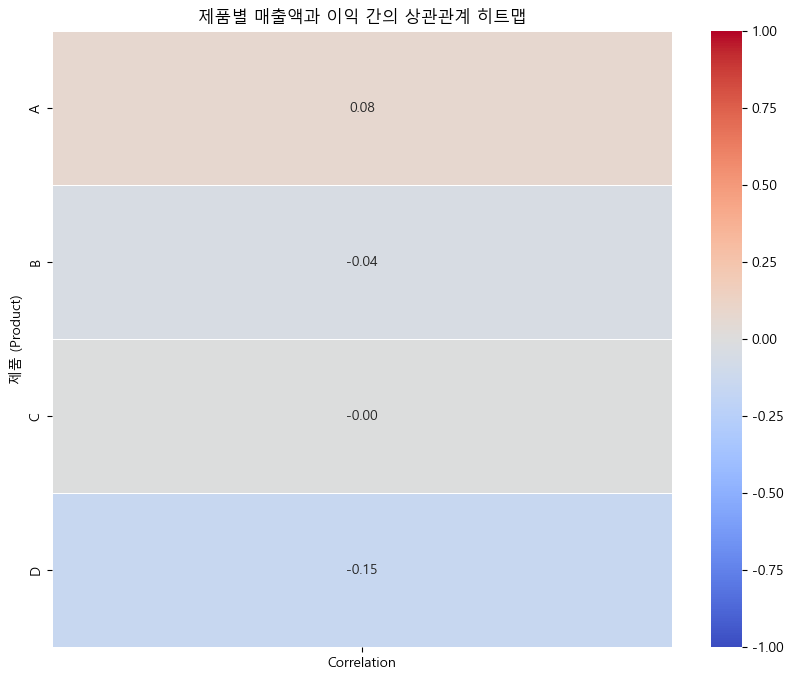

In [53]:
product_correlation_series = df.groupby('product')[['sales', 'profit']].corr().unstack().iloc[:, 1]

product_correlation_df = product_correlation_series.to_frame(name='Correlation')


plt.figure(figsize=(10, 8))
sns.heatmap(
    product_correlation_df,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True,
    vmin=-1,
    vmax=1
)

plt.title('제품별 매출액과 이익 간의 상관관계 히트맵')
plt.ylabel('제품 (Product)')
plt.show()

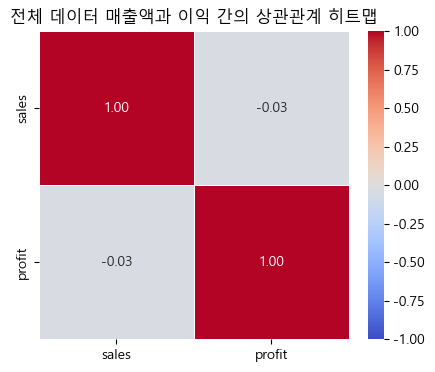

In [59]:
correlation_matrix = df[['sales', 'profit']].corr() 


plt.figure(figsize=(5, 4)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True,
    vmin=-1,
    vmax=1
)

plt.title('전체 데이터 매출액과 이익 간의 상관관계 히트맵')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

scatter = plt.scatter(df['sales'], df['profit'],
                      c=df['sales'], cmap='

## 지역별 평균 매출 지도 시각화(Folium)

In [56]:
import folium

region_sales = df.groupby('region')['sales'].mean()

region_coords = {
    '서울': [37.5665, 126.9780],
    '부산': [35.1796, 129.0756],
    '대구': [35.8714, 128.6014],
    '광주': [35.1595, 126.8526],
    '인천': [37.4563, 126.7052]
}

m = folium.Map(location=[36.5, 127.8], zoom_start=7)

for region, avg_sales in region_sales.items():
    folium.CircleMarker(
        location=region_coords[region],
        radius=avg_sales / 50,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{region}: {avg_sales:.1f}만원"
    ).add_to(m)


m.save("sales_map.html")
m
    

In [57]:
df

,date,region,product,sales,profit
0,2024-01-01,광주,B,982,173
1,2024-01-01,광주,C,134,124
2,2024-01-01,부산,D,148,123
3,2024-01-01,광주,A,745,74
4,2024-01-01,서울,B,389,147
...,...,...,...,...,...
995,2024-12-30,인천,C,731,77
996,2024-12-30,인천,C,585,11
997,2024-12-30,서울,B,836,27
998,2024-12-31,부산,D,378,175


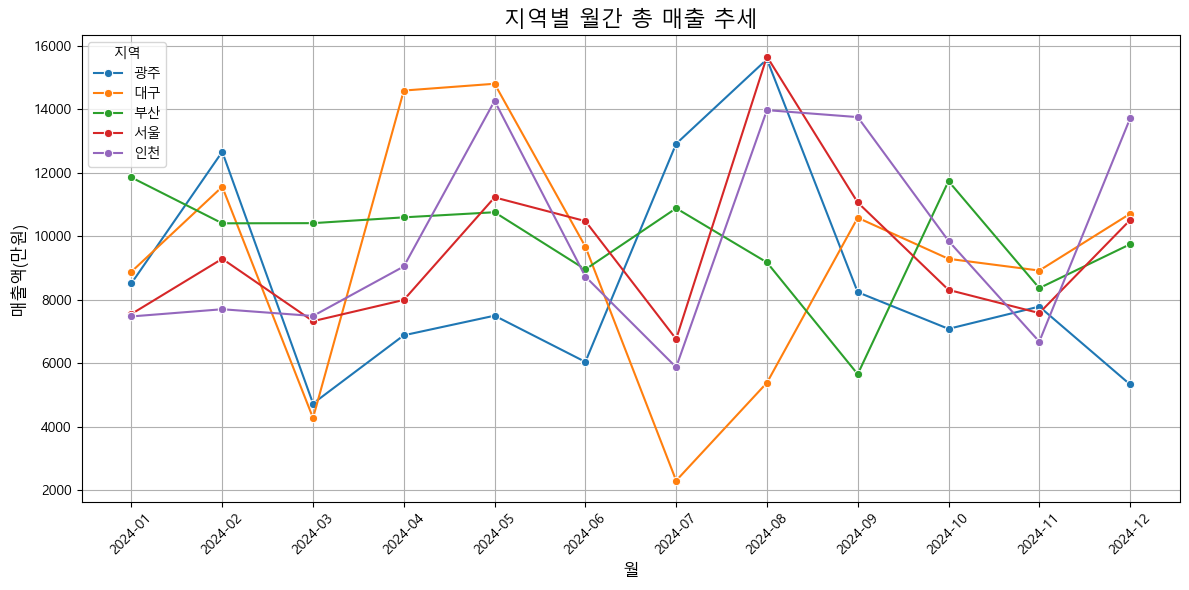

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_monthly_region = df.groupby([df['date'].dt.to_period('M'), 'region'])['sales'].sum().reset_index()

df_monthly_region['date'] = df_monthly_region['date'].astype(str)

plt.figure(figsize=(12, 6))

sns.lineplot(
    x='date',
    y='sales',
    hue='region',
    data=df_monthly_region,
    marker='o'
)

plt.title('지역별 월간 총 매출 추세', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('매출액(만원)', fontsize=12)
plt.grid(True)
plt.legend(title='지역')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

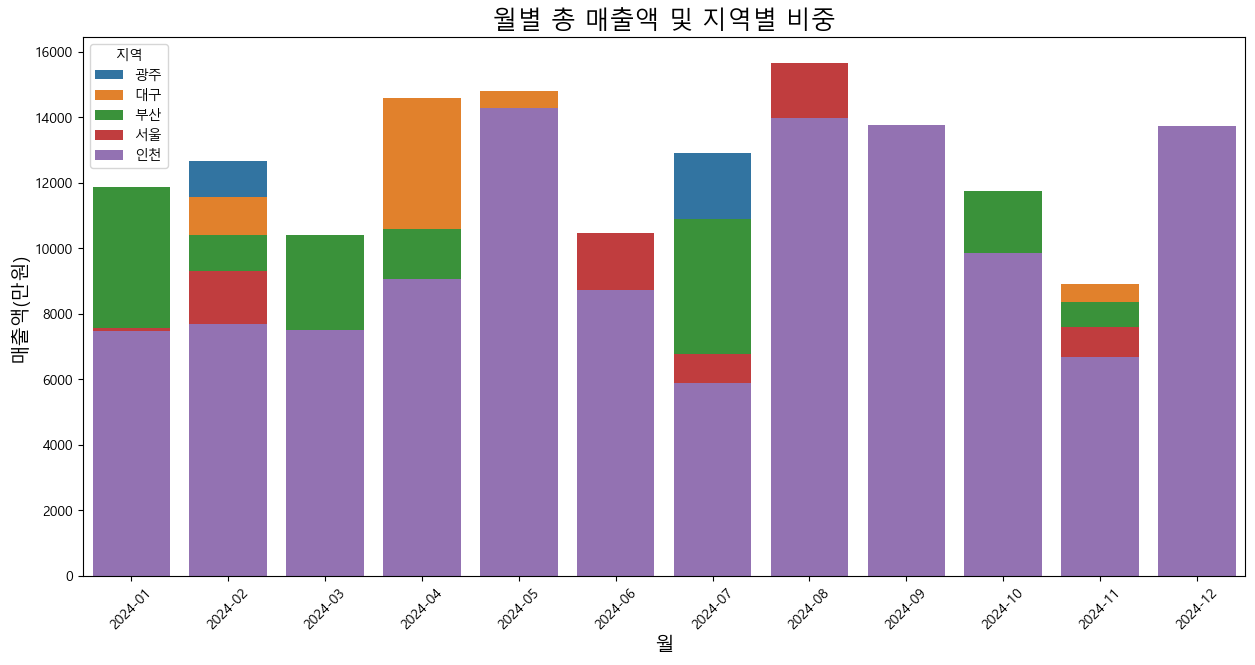

In [69]:
df['month'] = df['date'].dt.strftime('%Y-%m')
df_month_region = df.groupby(['month','region'])['sales'].sum().reset_index()

plt.figure(figsize=(15, 7))

sns.barplot(
    x='month',
    y='sales',
    hue='region',
    data=df_month_region,
    dodge=False 
)

plt.title('월별 총 매출액 및 지역별 비중', fontsize=18)
plt.xlabel('월', fontsize=14)
plt.ylabel('매출액(만원)', fontsize=14)
plt.legend(title='지역')

plt.xticks(rotation=45)
plt.show()

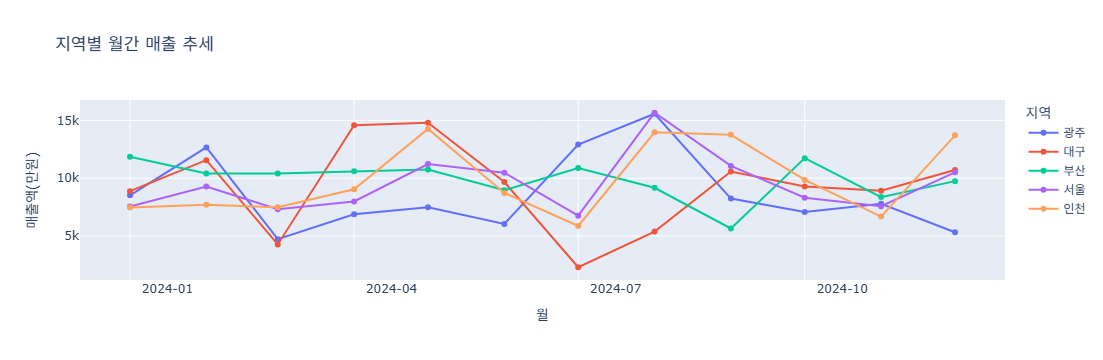

In [5]:
import plotly.express as px

df['month'] = df['date'].dt.strftime('%Y-%m')
df_month_region = df.groupby(['month','region'])['sales'].sum().reset_index()


plt = px.line(
    df_month_region,
    x='month',
    y='sales',
    color='region',
    title='지역별 월간 매출 추세',
    markers=True
)
    
plt.update_layout(
    xaxis_title='월',
    yaxis_title='매출액(만원)',
    legend_title='지역'
)

plt.update_xaxes(
    dtick="M3",
    tickformat="%Y-%m",
    ticklabelmode="period"
)

plt.show()
    

In [71]:
pip install --upgrade nbformat


   ----------- ---------------------------- 2/7 [attrs]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------------- 7/7 [nbformat]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


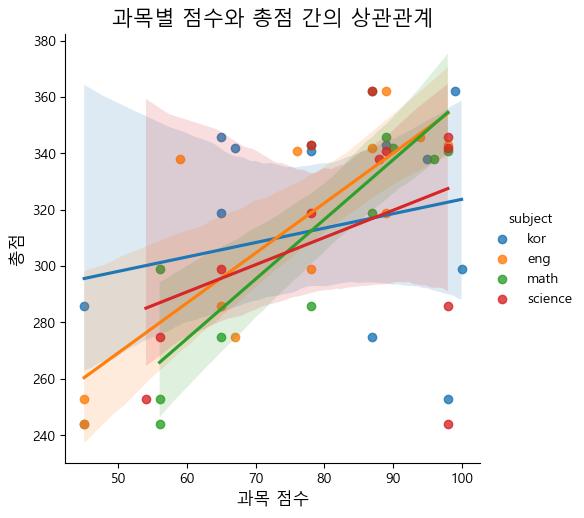

In [20]:
df_melted = sub.melt(
    id_vars=['total'], 
    value_vars=['kor', 'eng', 'math', 'science'],
    var_name='과목',
    value_name='총점'
)

sns.lmplot(
    x='score',         
    y='total',        
    hue='subject',     
    data=df_melted
)

plt.title('과목별 점수와 총점 간의 상관관계', fontsize=15)
plt.xlabel('과목 점수', fontsize=12)
plt.ylabel('총점', fontsize=12)
plt.show()